In [ ]:
import pandas as pd
tme = pd.read_csv('/content/tme up regulated.csv')
tme.head()

,gene.name,logFC,p.value
0,SNORD55,0.741215,5.270000e-12
1,SLC35E2,0.362937,2.640000e-11
2,PFDN6,0.448455,1.200000e-09
3,CTU1,0.321690,1.430000e-09
4,HIST1H3I///HIST1H3E,0.581610,3.300000e-09


random sampling

In [ ]:
import pandas as pd

# Specify the number of samples you want to draw
num_samples = 5000

# Perform random sampling
random_samples = tme.sample(n=num_samples, random_state=42)

# Display the randomly sampled data
print(random_samples)

# Save the randomly sampled data to a CSV file
random_samples.to_csv('random_samples.csv', index=False)


        gene.name     logFC   p.value
4678       OR56A3  0.181134  0.192000
1432         TWF1  0.516845  0.024300
410     LINC00470  0.765000  0.177000
3869       RABEPK  0.274264  0.547000
5067         GLTP  0.083785  0.221000
...           ...       ...       ...
1930    LINC02773  1.136154  0.055100
197   M6PR///PHC1  3.190000  0.021800
2931      C14orf1  0.101249  0.153901
2327        RSPH1  0.507490  0.168000
4389        HDAC4  0.276133  0.078100

[5000 rows x 3 columns]


In [ ]:
# Check the lengths of oversampled data and original data
print("Length of oversampled data:", len(random_samples))
print("Length of original data:", len(tme))

# Output the number of features in original data
print("Number of features in original data:", len(tme.columns))



Length of oversampled data: 5000
Length of original data: 5182
Number of features in original data: 3


In [ ]:
# Combine randomly sampled data with upregulated data from 'tme'
combined_data = pd.concat([random_samples, tme])

# Display the combined data
print(combined_data)

# Save the combined data to a CSV file
combined_data.to_csv('combined_data.csv', index=False)

      gene.name     logFC  p.value
4678     OR56A3  0.181134   0.1920
1432       TWF1  0.516845   0.0243
410   LINC00470  0.765000   0.1770
3869     RABEPK  0.274264   0.5470
5067       GLTP  0.083785   0.2210
...         ...       ...      ...
5177      PXMP2  0.166993   0.1080
5178      ZNF10  0.212780   0.1060
5179     ZNF140  0.208981   0.1570
5180     ZNF268  0.248085   0.0319
5181     ZNF605  0.426138   0.2430

[10182 rows x 3 columns]


In [ ]:
# Check the lengths of combined data and original data
print("Length of combined data:", len(combined_data))
print("Length of original data:", len(tme))

# Output the number of features in original data
print("Number of features in original data:", len(tme.columns))



Length of combined data: 10182
Length of original data: 5182
Number of features in original data: 3


In [ ]:
from google.colab import files

# Download the combined CSV file
files.download('combined_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Trained random sample data

In [ ]:
import pandas as pd
rs = pd.read_csv('/content/random_samples.csv')
rs.head()

,gene.name,logFC,p.value
0,OR56A3,0.181134,0.1920
1,TWF1,0.516845,0.0243
2,LINC00470,0.765000,0.1770
3,RABEPK,0.274264,0.5470
4,GLTP,0.083785,0.2210


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

threshold_logFC = 1.0    # Example threshold for logFC

# Correct the target variable creation using 'tme' DataFrame
rs['is_associated'] = (rs['logFC'] > threshold_logFC)

# Separate features (gene names) and target variable
X = rs['gene.name'].astype(str)  # Ensure 'gene.name' column is treated as string
y = rs['is_associated']           # Target variable

# Initialize CountVectorizer to convert gene names into numerical features
vectorizer = CountVectorizer()

# Transform gene names into numerical features
X_transformed = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.846


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Separate features (X) and target variable (y)
X_t = rs['gene.name'].values # Features
y = rs['logFC']  # Target variable

vectorizer= CountVectorizer()
X = vectorizer.fit_transform(X_t)

# Encode the categorical target variable into binary format
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logistic_reg = LinearRegression()

# Train the model
logistic_reg.fit(X_train, y_train)

# Evaluate the model
train_accuracy = logistic_reg.score(X_train, y_train)
test_accuracy = logistic_reg.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9888480591186863
Test Accuracy: -0.12603775331065936


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features (X) and target variable (y)
X = rs[['gene.name']]  # Features
y = rs['logFC']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize target encoder
encoder = TargetEncoder()

# Fit target encoder on training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize and train the Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
training_accuracy = lasso.score(X_train_scaled, y_train)
test_accuracy = lasso.score(X_test_scaled, y_test)

print("Training R^2 Score:", training_accuracy)
print("Test R^2 Score:", test_accuracy)


Training R^2 Score: 0.9608100442428573
Test R^2 Score: -4.410553266920303e-05


#Trained combined data

In [ ]:
import pandas as pd
cs = pd.read_csv('/content/combined_data.csv')
cs.head()

,gene.name,logFC,p.value
0,OR56A3,0.181134,0.1920
1,TWF1,0.516845,0.0243
2,LINC00470,0.765000,0.1770
3,RABEPK,0.274264,0.5470
4,GLTP,0.083785,0.2210


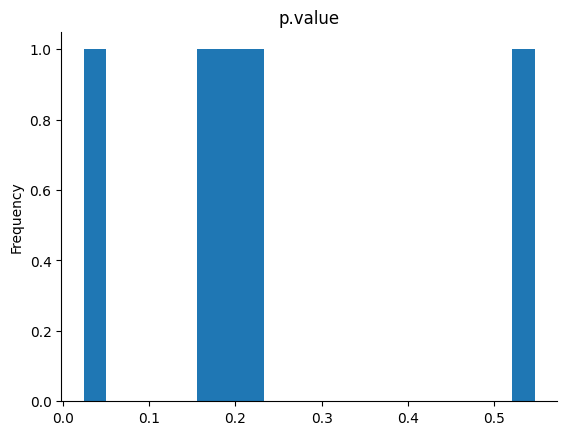

In [ ]:
from matplotlib import pyplot as plt
_df_1['p.value'].plot(kind='hist', bins=20, title='p.value')
plt.gca().spines[['top', 'right',]].set_visible(False)

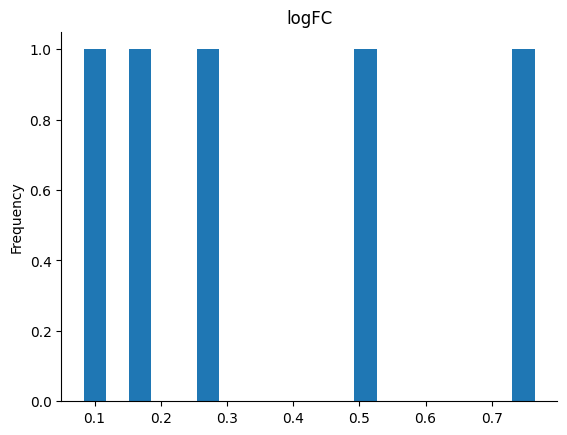

In [ ]:
from matplotlib import pyplot as plt
_df_0['logFC'].plot(kind='hist', bins=20, title='logFC')
plt.gca().spines[['top', 'right',]].set_visible(False)

random forest classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

threshold_logFC = 0.5    # Example threshold for logFC

# Correct the target variable creation using 'tme' DataFrame
cs['is_associated'] = (cs['logFC'] > threshold_logFC)

# Separate features (gene names) and target variable
X = cs['gene.name'].astype(str)  # Ensure 'gene.name' column is treated as string
y = cs['is_associated']           # Target variable

# Initialize CountVectorizer to convert gene names into numerical features
vectorizer = CountVectorizer()

# Transform gene names into numerical features
X_transformed = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.898379970544919


In [ ]:
def predict_microenvironment_association(gene_name, vectorizer, rf_classifier):
    try:
        # Transform the gene name into numerical features using the same CountVectorizer
        gene_encoded = vectorizer.transform([gene_name])

        # Print the encoded gene features for debugging
        print("Encoded Gene Features:", gene_encoded)

        # Make a prediction using the trained random forest classifier
        prediction = rf_classifier.predict(gene_encoded)

        # Convert the prediction to a human-readable format
        if prediction == 1:
            print(f"The gene '{gene_name}' is associated with the tumor microenvironment.")
        else:
            print(f"The gene '{gene_name}' is not associated with the tumor microenvironment.")
    except Exception as e:
        print("An error occurred during prediction:", e)

# Example usage:
gene_name = input("Enter the gene name: ")
predict_microenvironment_association(gene_name, vectorizer, rf_classifier)


Enter the gene name: TWF1
Encoded Gene Features:   (0, 5077)	1
The gene 'TWF1' is associated with the tumor microenvironment.


linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

threshold_logFC = 0.5    # Example threshold for logFC

# Correct the target variable creation using 'tme' DataFrame
cs['is_associated'] = (cs['logFC'] > threshold_logFC)

# Separate features (X) and target variable (y)
X_t = cs['gene.name'].values  # Features
y = cs['is_associated']  # Target variable

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_t)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Evaluate the model
train_accuracy = linear_reg.score(X_train, y_train)
test_accuracy = linear_reg.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9905463590358733
Test Accuracy: 0.6043901782808664


In [ ]:
def predict_microenvironment_association(gene_name, vectorizer, linear_reg):
    try:

        # Transform the gene name into numerical features using the same CountVectorizer
        gene_encoded = vectorizer.transform([gene_name])

        # Print the encoded gene features for debugging
        print("Encoded Gene Features:", gene_encoded)

        # Make a prediction using the trained Random Forest Classifier
        prediction = rf_classifier.predict(gene_encoded)

        # Convert the prediction to a human-readable format
        if prediction == 1:
            print(f"The gene '{gene_name}' is associated with the tumor microenvironment.")
        else:
            print(f"The gene '{gene_name}' is not associated with the tumor microenvironment.")
    except Exception as e:
        print("An error occurred during prediction:", e)

# Example usage:
gene_name = input("Enter the gene name: ")
predict_microenvironment_association(gene_name, vectorizer, rf_classifier)


Enter the gene name: TWF1
Encoded Gene Features:   (0, 5077)	1
The gene 'TWF1' is associated with the tumor microenvironment.


lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

threshold_logFC = 0.5

# Correct the target variable creation using 'tme' DataFrame
cs['is_associated'] = (cs['logFC'] > threshold_logFC)

# Separate features (X) and target variable (y)
X = cs[['gene.name']]  # Features
y = cs['is_associated']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize target encoder
encoder = TargetEncoder()

# Fit target encoder on training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize and train the Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
training_accuracy = lasso.score(X_train_scaled, y_train)
test_accuracy = lasso.score(X_test_scaled, y_test)

print("Training R^2 Score:", training_accuracy)
print("Test R^2 Score:", test_accuracy)


Training R^2 Score: 0.9588073281831361
Test R^2 Score: 0.732326376235659


In [ ]:
def predict_microenvironment_association(gene_name, vectorizer, lasso_fit):
    try:
        # Transform the gene name into numerical features using the same CountVectorizer
        gene_encoded = vectorizer.transform([gene_name])

        # Print the encoded gene features for debugging
        print("Encoded Gene Features:", gene_encoded)

        # Make a prediction using the trained random forest regressor
        prediction = rf_classifier.predict(gene_encoded)

        # Convert the prediction to a human-readable format
        if prediction == 1:
            print(f"The gene '{gene_name}' is associated with the tumor microenvironment.")
        else:
            print(f"The gene '{gene_name}' is not associated with the tumor microenvironment.")
    except Exception as e:
        print("An error occurred during prediction:", e)

# Example usage:
gene_name = input("Enter the gene name: ")
predict_microenvironment_association(gene_name, vectorizer, rf_classifier)


Enter the gene name: TWF1
Encoded Gene Features:   (0, 5077)	1
The gene 'TWF1' is associated with the tumor microenvironment.


random forest regressor

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

threshold_logFC = 0.5

# Correct the target variable creation using 'tme' DataFrame
cs['is_associated'] = (cs['logFC'] > threshold_logFC)

# Convert numerical data to strings
cs['gene.name'] = cs['gene.name'].astype(str)

# Separate features (X) and target variable (y)
X_t = cs['gene.name'].values  # Features
y = cs[('is_associated')]  # Target variable

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform gene names into numerical features
X = vectorizer.fit_transform(X_t)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest regressor with bootstrap=True
rf_regressor = RandomForestRegressor(n_estimators=50, bootstrap=True, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)


Training Accuracy: 0.9145592992631079
Test Accuracy: 0.39940771516915174


In [ ]:
def predict_microenvironment_association(gene_name, vectorizer, rf_regressor):
    try:
        # Transform the gene name into numerical features using the same CountVectorizer
        gene_encoded = vectorizer.transform([gene_name])

        # Print the encoded gene features for debugging
        print("Encoded Gene Features:", gene_encoded)

        # Make a prediction using the trained random forest regressor
        prediction = rf_classifier.predict(gene_encoded)

        # Convert the prediction to a human-readable format
        if prediction == 1:
            print(f"The gene '{gene_name}' is associated with the tumor microenvironment.")
        else:
            print(f"The gene '{gene_name}' is not associated with the tumor microenvironment.")
    except Exception as e:
        print("An error occurred during prediction:", e)

# Example usage:
gene_name = input("Enter the gene name: ")
predict_microenvironment_association(gene_name, vectorizer, rf_classifier)


Enter the gene name: TWF1
Encoded Gene Features:   (0, 5077)	1
The gene 'TWF1' is associated with the tumor microenvironment.


support vector machine

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

threshold_logFC = 0.5

# Correct the target variable creation using 'tme' DataFrame
cs['is_associated'] = (cs['logFC'] > threshold_logFC)

# Convert numerical data to strings
cs['gene.name'] = cs['gene.name'].astype(str)

# Separate features (X) and target variable (y)
X = cs[['gene.name']]  # Features
y = cs['is_associated']  # Target variable

# One-hot encode the categorical feature 'gene.name'
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate the Support Vector Machine (SVM) regressor
svm_regressor = SVR(kernel='linear')

# Train the model
svm_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = svm_regressor.score(X_train, y_train)
test_score = svm_regressor.score(X_test, y_test)

print("Training Score:", train_score)
print("Test Score:", test_score)


Training Score: 0.9600042110857953
Test Score: 0.7514202450627155


In [ ]:
def predict_microenvironment_association(gene_name, vectorizer, svm_regressor):
    try:
        # Transform the gene name into numerical features using the same CountVectorizer
        gene_encoded = vectorizer.transform([gene_name])

        # Print the encoded gene features for debugging
        print("Encoded Gene Features:", gene_encoded)

        # Make a prediction using the trained Support Vector Machine
        prediction = rf_classifier.predict(gene_encoded)

        # Convert the prediction to a human-readable format
        if prediction == 1:
            print(f"The gene '{gene_name}' is associated with the tumor microenvironment.")
        else:
            print(f"The gene '{gene_name}' is not associated with the tumor microenvironment.")
    except Exception as e:
        print("An error occurred during prediction:", e)

# Example usage:
gene_name = input("Enter the gene name: ")
predict_microenvironment_association(gene_name, vectorizer, rf_classifier)


Enter the gene name: TWF1
Encoded Gene Features:   (0, 5077)	1
The gene 'TWF1' is associated with the tumor microenvironment.


testing


test case1


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_csv('/content/drug resistance gene test1.csv')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model
model = RandomForestClassifier()

In [ ]:
import pandas as pd

# Transform gene names into numerical features
X_transformed = vectorizer.transform(df['Gene.symbol'].astype(str))

# Make predictions for each gene
df['TME_Association'] = rf_classifier.predict(X_transformed)

# Save the predictions along with the gene names to a new CSV file
df.to_csv('gene_predictions.csv', index=False)


NameError: name 'vectorizer' is not defined

In [ ]:

# Assuming the test data needs the same preprocessing as the training data
X_test_transformed = vectorizer.transform(df['Gene.symbol'].values.astype(str))

# Make predictions using the trained Linear Regression model
predictions = linear_reg.predict(X_test_transformed)

# Convert predictions to binary format based on the threshold
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Add predictions to the DataFrame
df['Predicted_is_associated'] = binary_predictions

# Save the predictions to a new CSV file
df.to_csv('predicted_results.csv', index=False)


test case2


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_csv('/content/organ specific genes test2.csv')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model
model = RandomForestClassifier()

In [ ]:
import pandas as pd

# Transform gene names into numerical features
X_transformed = vectorizer.transform(df['Gene.symbol'].astype(str))

# Make predictions for each gene
df['TME_Association'] = rf_classifier.predict(X_transformed)

# Save the predictions along with the gene names to a new CSV file
df.to_csv('gene_predictions2.csv', index=False)


test3


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_csv('/content/malignant genes test3.csv')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model
model = RandomForestClassifier()

In [ ]:
import pandas as pd

# Transform gene names into numerical features
X_transformed = vectorizer.transform(df['Gene.symbol'].astype(str))

# Make predictions for each gene
df['TME_Association'] = rf_classifier.predict(X_transformed)

# Save the predictions along with the gene names to a new CSV file
df.to_csv('gene_predictions3.csv', index=False)
